In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi Okuma

In [2]:
ds_salaries = pd.read_csv("ds_salaries.csv")
df = ds_salaries.copy()
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# GENEL ÖZET

In [3]:
df.shape

(607, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,607.0,303.000000,1.753701e+02,0.0,151.5,303.0,454.5,606.0
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


In [6]:
df.drop(df[['salary','salary_currency','Unnamed: 0']],axis='columns', inplace=True)
df.head()
# İşimize yaramayacak olan columnsları drop etme işlemi.

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,0.692133,2020.0,2021.0,2022.0,2022.0,2022.0
salary_in_usd,607.0,112297.869852,70957.259411,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,40.709130,0.0,50.0,100.0,100.0,100.0


In [8]:
df["remote_ratio"] = df["remote_ratio"].replace([0, 50, 100], ["No remote", "Partially remote", "Fully remote"])
# "remote_ratio" sütunundaki verileri daha anlamlı hale çevirdik.

# Data Preprocessing

## Duplicate Control

In [9]:
df.duplicated().sum() # 42 adet bütün sütunları aynı değer olan satır olduğunu gözlemledik.

42

In [10]:
df.drop_duplicates(inplace= True) # Bu satırları drop etme işlemi.

## NaN Control

In [11]:
df.isna().sum() # NaN değer olmadığınında yapabileceğimiz bir işlem yok.

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## EDA

In [12]:
# Çalışılan departmanlara göre ortalama en fazla maaş alan ilk 5 departman.
df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending = False).head()

job_title
Data Analytics Lead         405000.000000
Principal Data Engineer     328333.333333
Financial Data Analyst      275000.000000
Principal Data Scientist    215242.428571
Director of Data Science    195074.000000
Name: salary_in_usd, dtype: float64

C:\Users\90505\AppData\Local\Temp\ipykernel_13556\2111428892.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_5, palette="Blues")


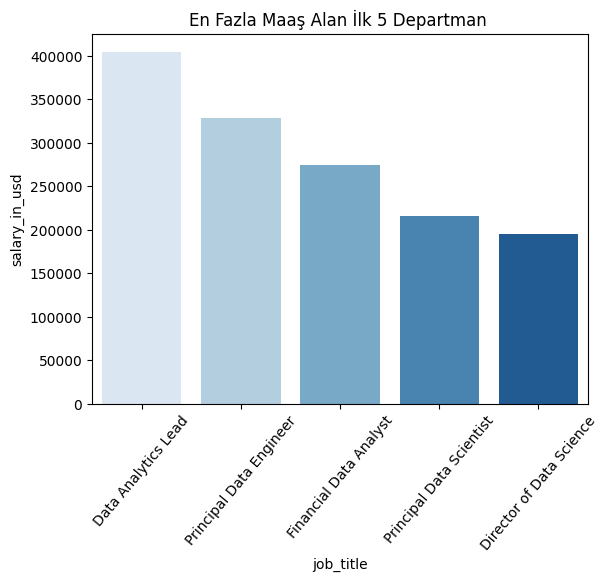

In [13]:
top_5 = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head()
plt.xticks(rotation = 50)
sns.barplot(data = top_5, palette="Blues")
plt.title('En Fazla Maaş Alan İlk 5 Departman ');



<Figure size 2000x600 with 0 Axes>

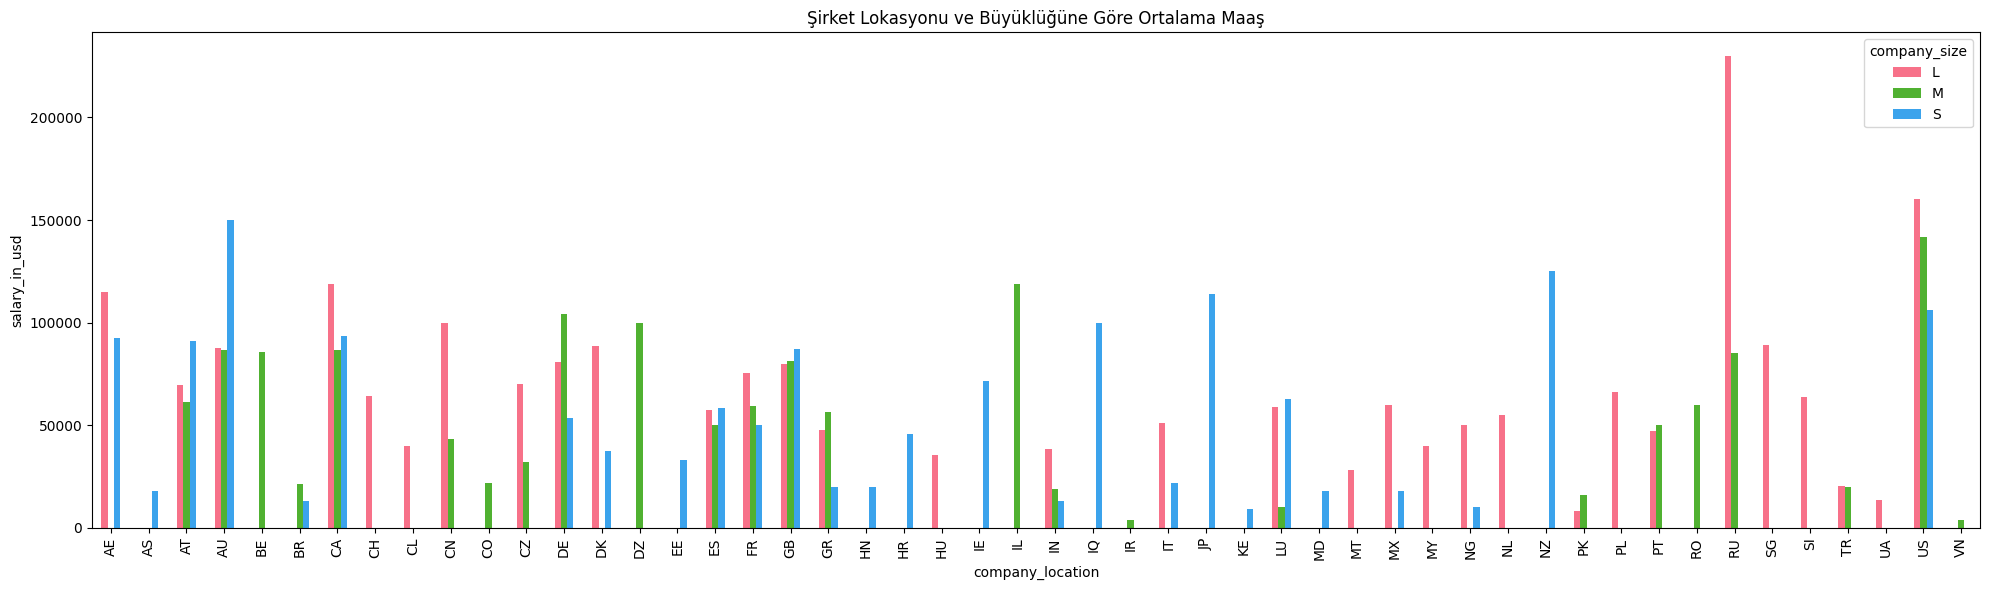

In [14]:
# Şirketin bulunduğu yer ve büyüklüğüne göre ortalama maaş miktarını gösteren grafik.

grouped_data = df.groupby(['company_location', 'company_size'])['salary_in_usd'].mean().unstack()

palette = sns.color_palette("husl", len(grouped_data.columns))

plt.figure(figsize=(20, 6))
grouped_data.plot(kind="bar", figsize=(20, 6), color=palette, rot=90)

plt.xlabel('company_location')
plt.ylabel('salary_in_usd')
plt.title('Şirket Lokasyonu ve Büyüklüğüne Göre Ortalama Maaş')

plt.tight_layout()
plt.show()


In [15]:
# Aykırı değerleri inceleme işlemi.
numeric_columns = df.select_dtypes(include=['int', 'float'])

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in numeric_columns.columns:
    df = remove_outliers_iqr(df, column)

df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,No remote,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,No remote,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,Partially remote,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,No remote,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,Partially remote,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,Fully remote,US,M
603,2022,SE,FT,Data Engineer,126000,US,Fully remote,US,M
604,2022,SE,FT,Data Analyst,129000,US,No remote,US,M
605,2022,SE,FT,Data Analyst,150000,US,Fully remote,US,M


In [88]:
df.reset_index(inplace = True, drop= True) # Aykırı değerleri drop ettikten sonra index resetleme işlemi

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

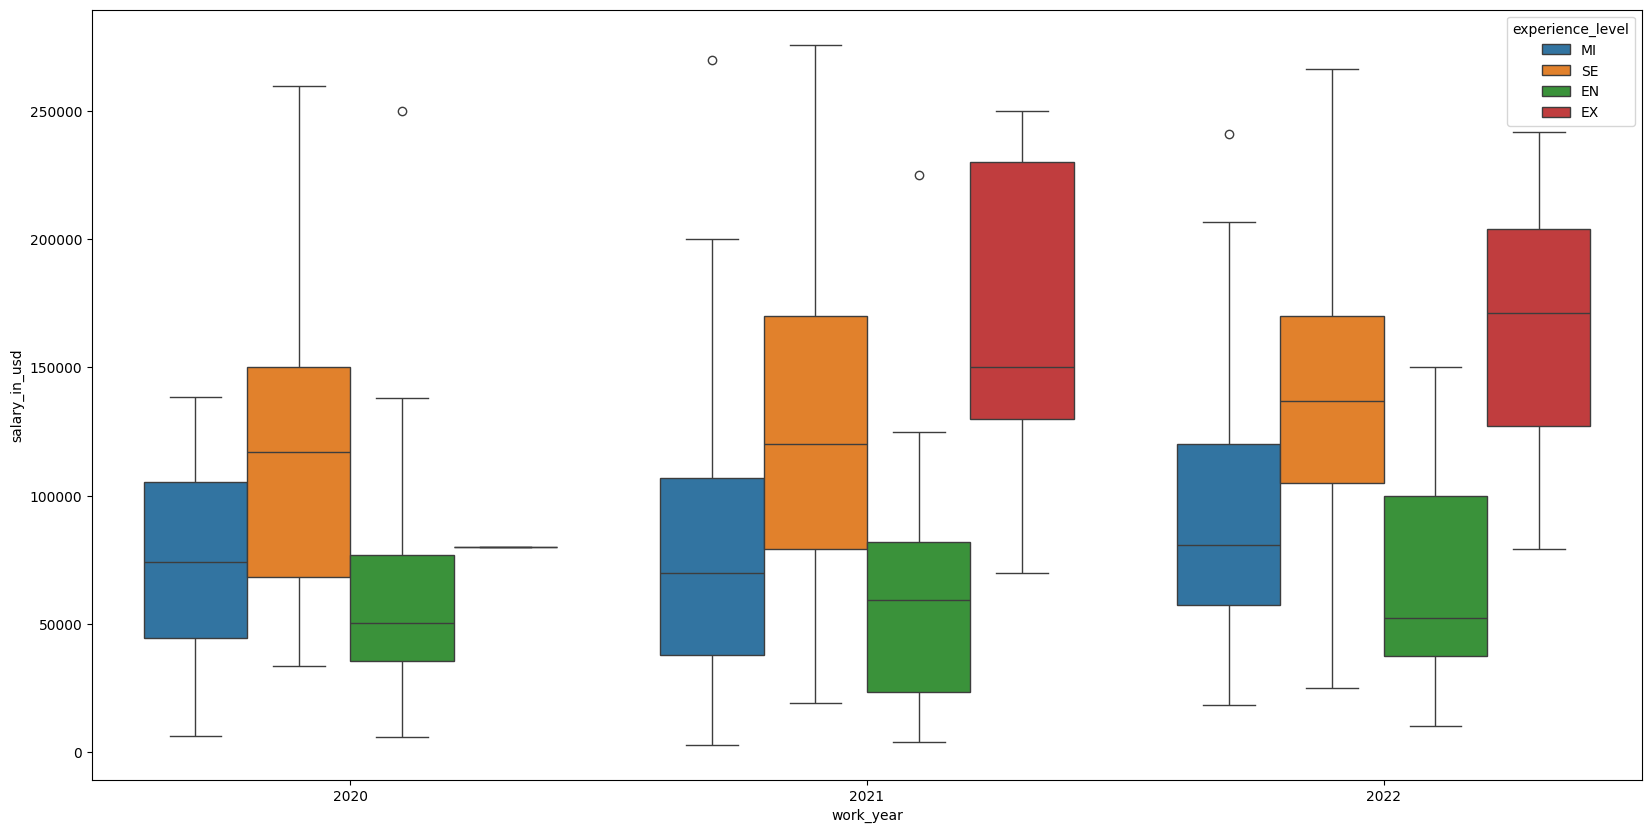

In [16]:
# Deneyim seviyelerinin yıllara göre aldığı maaş miktarları.
plt.figure(figsize=(20,10))
sns.boxplot(data = df , x = "work_year" , y = "salary_in_usd" , hue = "experience_level")

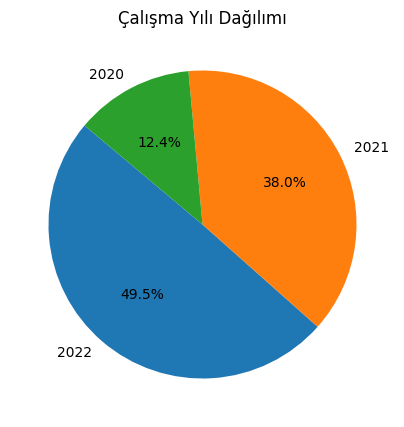

In [17]:
work_year_counts = df['work_year'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(work_year_counts, labels=work_year_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Çalışma Yılı Dağılımı')
plt.show()

# # 2020 yılından itibaren her yıl çalışan sayısının arttığı gözlemleniyor.

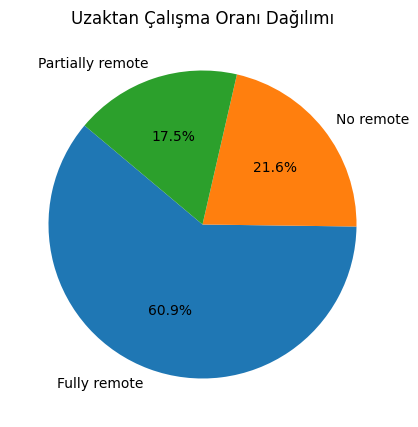

In [18]:
work_year_counts = df['remote_ratio'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(work_year_counts, labels=work_year_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Uzaktan Çalışma Oranı Dağılımı')
plt.show()

# Burada uzaktan çalışmanın tam zamanlı veya yarı zamanlı çalışmaya göre daha çok tercih edildiğini anlıyoruz.